In [45]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
import sys
sys.path.append('/jbk001-data1/git/SuperPnP/')

import torch
import cv2
from matplotlib import pyplot as plt
import numpy as np
import random

In [66]:
outs_dict = torch.load('inference_outs.pth')

outs_dict['correspondences'].shape, outs_dict['inputs']['image1'].shape



(torch.Size([1, 4, 5000]), (256, 832, 3))

In [67]:
cat_images = np.concatenate([ outs_dict['inputs']['image1'],  outs_dict['inputs']['image2']], axis=0)
correspondences = outs_dict['correspondences'].squeeze().T

h, w = cat_images.shape[0] / 2, cat_images.shape[1] / 2

correspondences[0], h, w


(tensor([544.0000, 161.0000, 554.9391, 161.8773], device='cuda:0',
        grad_fn=<SelectBackward>),
 256.0,
 416.0)

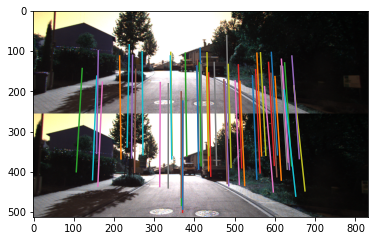

In [69]:
plt.imshow(cat_images, aspect='equal')

for i in range(50):
    plt.plot([correspondences[i][0], correspondences[i][2]], [correspondences[i][1], correspondences[i][3] + h])

plt.show()
plt.savefig('correspondence_out.png')